# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.


In [73]:
import numpy as np 
import pandas as pd

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [76]:
# Importing csv file 

In [77]:
ad = pd.read_csv('advertising.csv')
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [78]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [79]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<Axes: >

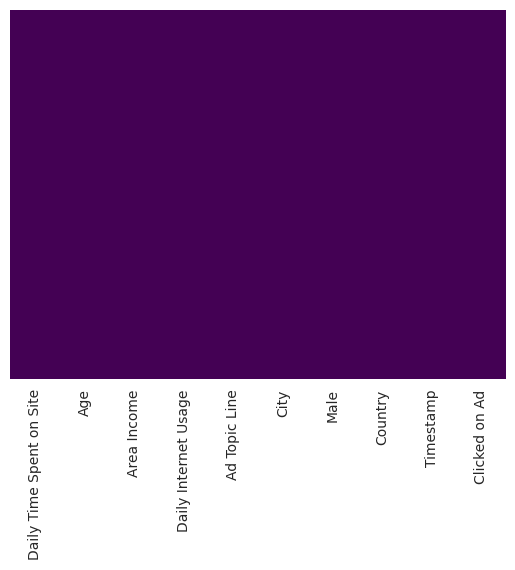

In [80]:
sns.heatmap(ad.isnull(), cbar= False, cmap = 'viridis', yticklabels=False)

In [81]:
# hence there is no null values in any column

In [82]:
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [83]:
sns.set_style('whitegrid')

/home/sudeep/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


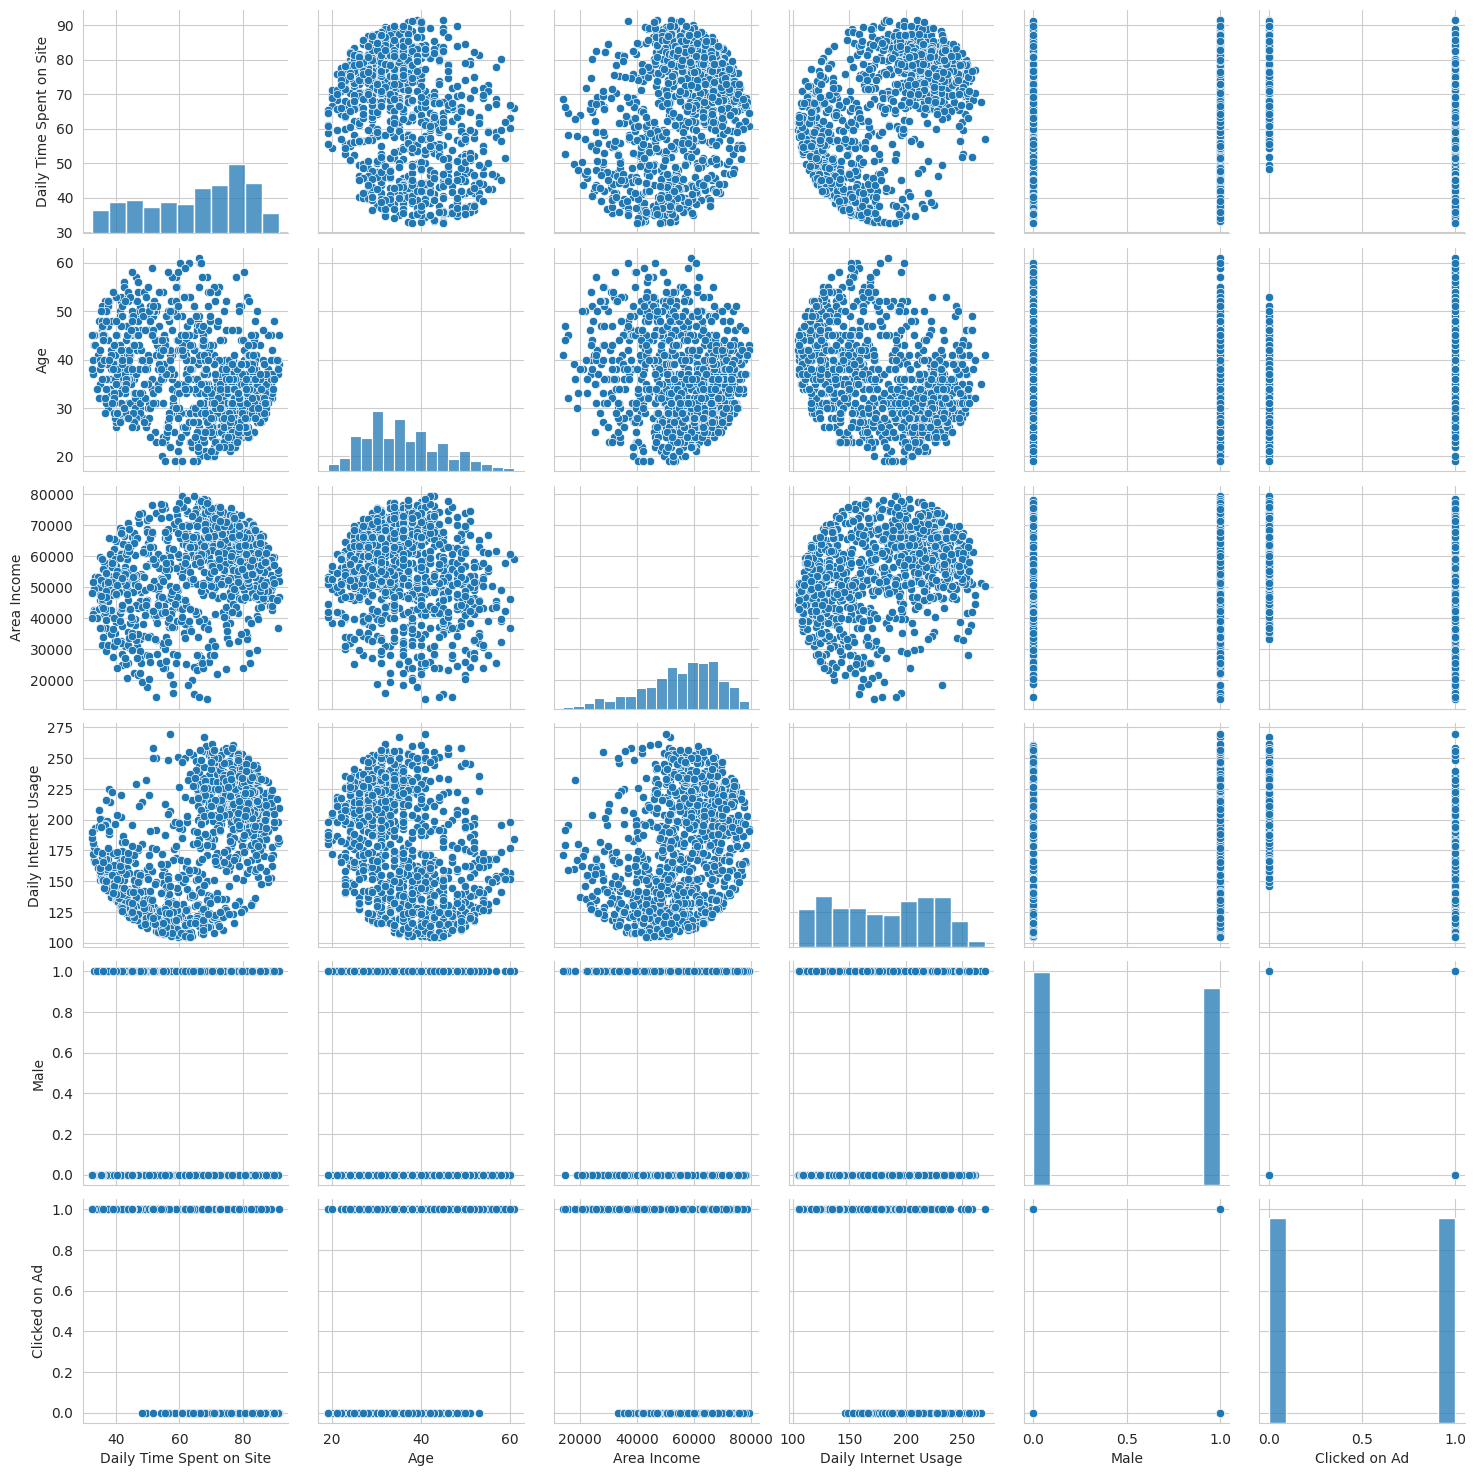

In [84]:
sns.pairplot(ad)

In [85]:
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


<Axes: xlabel='Age', ylabel='count'>

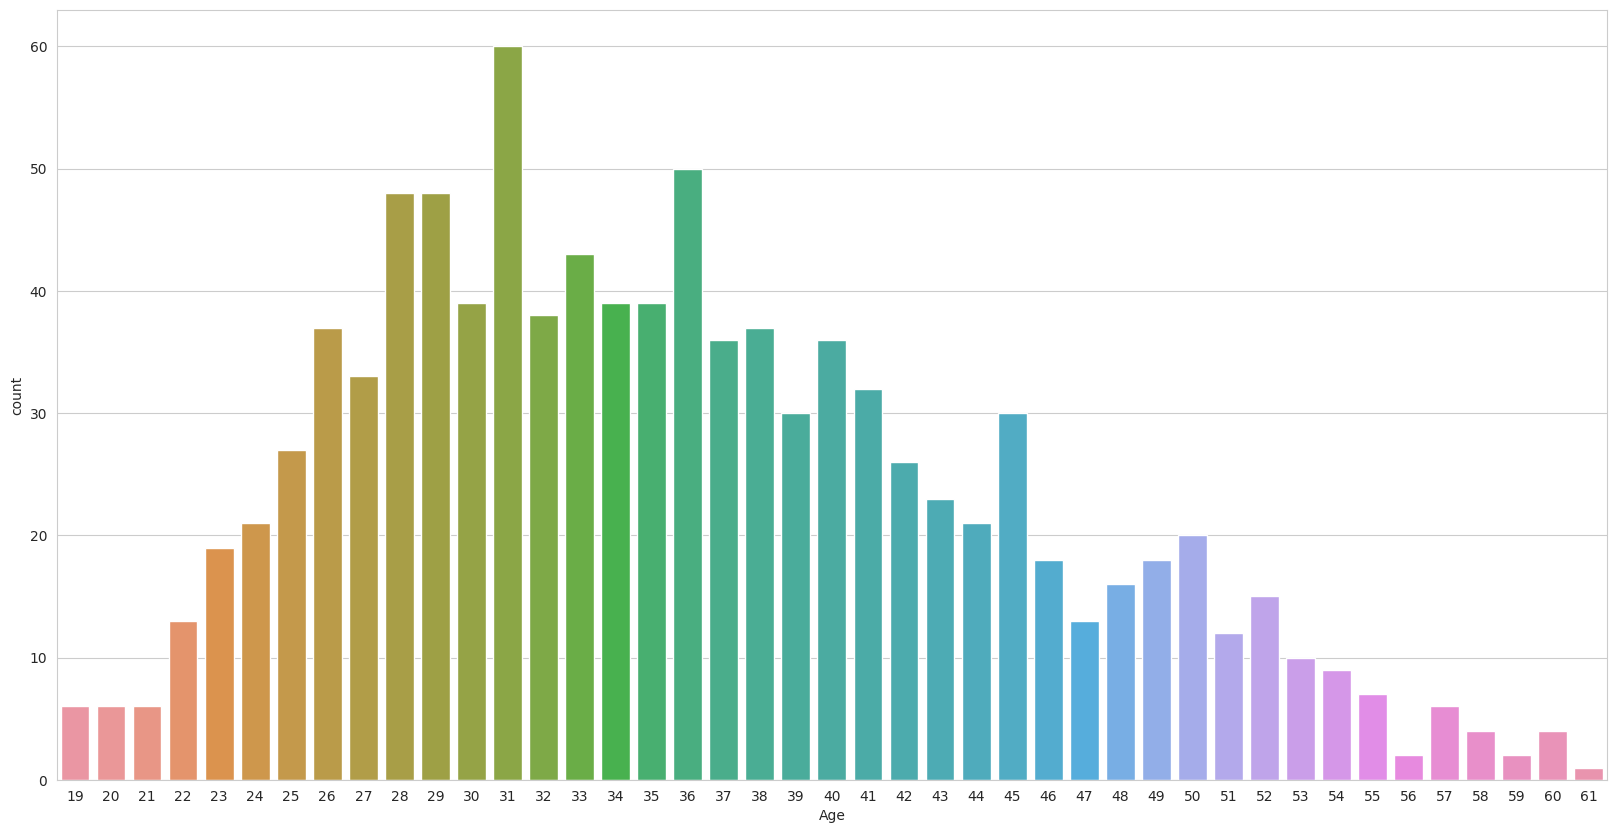

In [86]:
plt.figure(figsize= (20,10))
sns.countplot(x='Age' , data=ad)

In [87]:
for column in ad.columns:
    print(column)

Daily Time Spent on Site
Age
Area Income
Daily Internet Usage
Ad Topic Line
City
Male
Country
Timestamp
Clicked on Ad


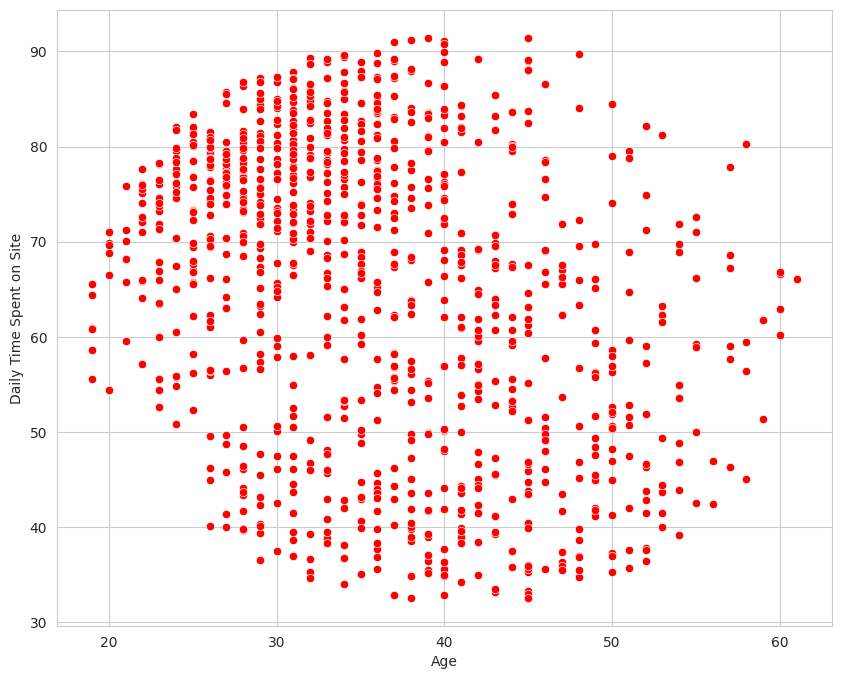

In [90]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Age', y='Daily Time Spent on Site', data=ad, color='red')
plt.show()

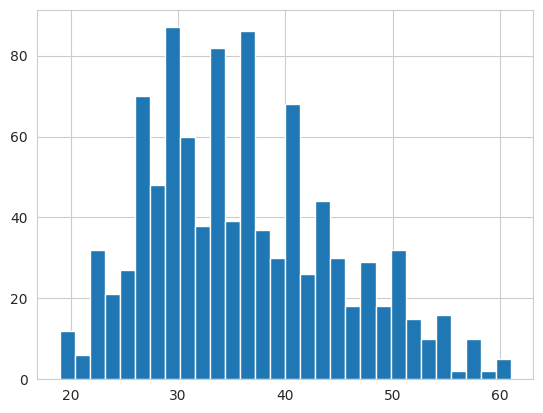

In [91]:
plt.hist(ad.Age, bins= 30)
plt.show()

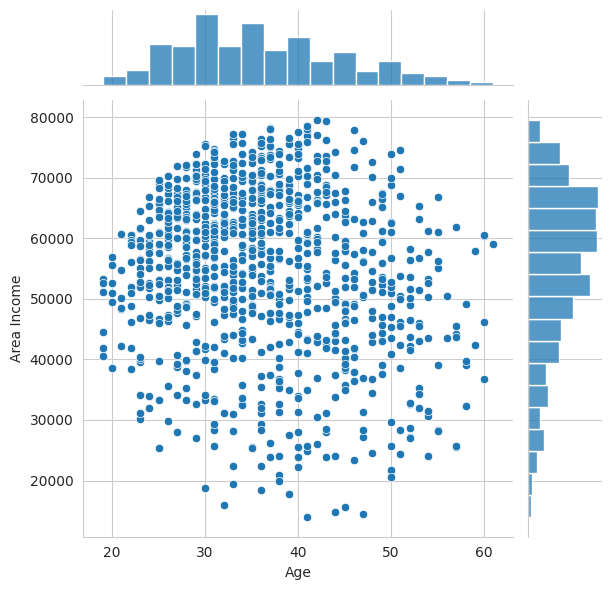

In [89]:
sns.jointplot(x='Age', y='Area Income', data=ad)

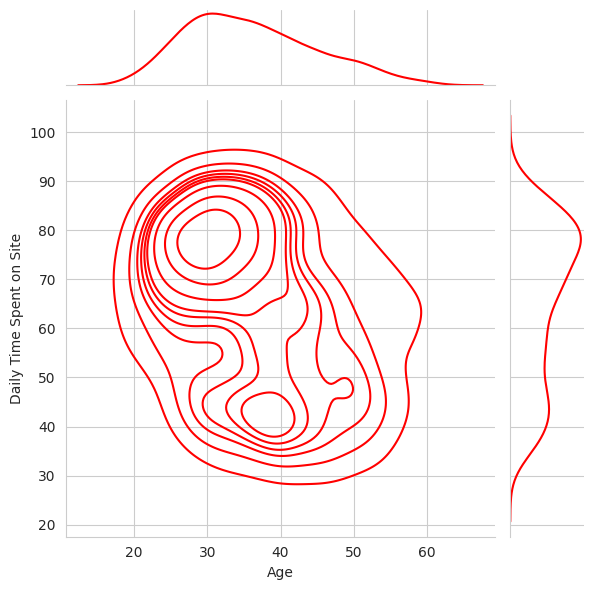

In [88]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data= ad, color ='r',kind='kde')

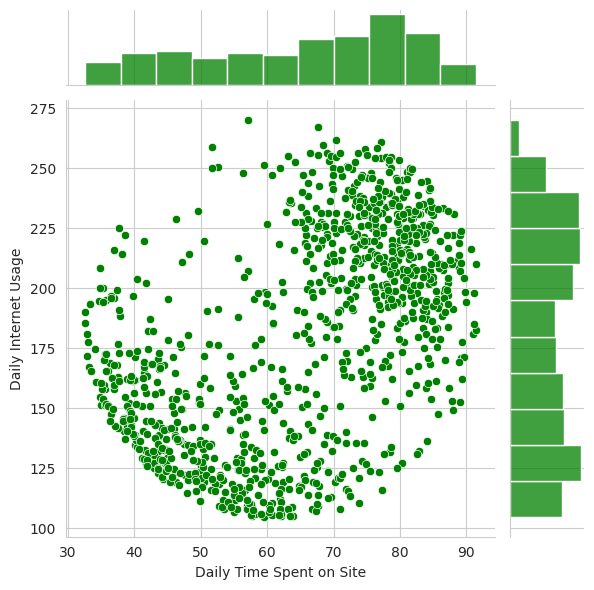

In [92]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data= ad,color='g')

## Logistic Regression 

### train test split


In [93]:
ad

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


In [94]:
# So here we want to predict the values of Clicked on Ad by using features 'Daily time spent on site', 'Area Income', 'Daily Internet Usages', etc

In [102]:
X= ad[['Daily Time Spent on Site','Area Income','Daily Internet Usage','Age','Male']]
y = ad['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=101,test_size=0.33)

In [103]:
logreg = LogisticRegression()

In [104]:
logreg.fit(X_train, y_train)

/home/sudeep/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [106]:
prediction = logreg.predict(X_test)
for i in range(0,len(prediction)):
    print(i,prediction[i])

0 1
1 0
2 0
3 1
4 0
5 1
6 1
7 1
8 1
9 1
10 0
11 1
12 0
13 1
14 1
15 1
16 0
17 0
18 1
19 0
20 1
21 1
22 1
23 0
24 0
25 1
26 0
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 0
35 1
36 0
37 0
38 0
39 1
40 1
41 0
42 1
43 0
44 0
45 1
46 1
47 0
48 0
49 0
50 1
51 0
52 1
53 1
54 1
55 0
56 1
57 1
58 0
59 1
60 1
61 1
62 1
63 0
64 0
65 1
66 0
67 0
68 0
69 1
70 0
71 0
72 0
73 0
74 0
75 1
76 1
77 0
78 0
79 1
80 0
81 1
82 0
83 1
84 0
85 0
86 1
87 1
88 0
89 1
90 0
91 1
92 0
93 0
94 1
95 0
96 0
97 0
98 0
99 1
100 1
101 0
102 0
103 1
104 1
105 0
106 0
107 0
108 0
109 0
110 0
111 0
112 1
113 1
114 1
115 0
116 1
117 1
118 0
119 0
120 0
121 1
122 0
123 0
124 1
125 0
126 0
127 1
128 1
129 0
130 1
131 0
132 0
133 0
134 0
135 0
136 0
137 1
138 0
139 0
140 1
141 1
142 1
143 0
144 0
145 1
146 0
147 0
148 0
149 0
150 1
151 1
152 1
153 0
154 1
155 1
156 0
157 0
158 1
159 0
160 1
161 0
162 1
163 1
164 0
165 0
166 0
167 0
168 0
169 0
170 0
171 1
172 1
173 1
174 1
175 0
176 0
177 0
178 0
179 0
180 1
181 0
182 0
183 1
184 0


In [107]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       171
           1       0.99      0.97      0.98       159

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



In [108]:
from sklearn.metrics import confusion_matrix

In [109]:
print(confusion_matrix(y_test, prediction))

[[170   1]
 [  5 154]]


# From the above confusion metrics
* 170 --> True Positive (Predicted yes, actual yes)
* 1 --> Flase Positive (Predicted yes, actual No)
*  5 --> False Negative (Predicted No, Actual yes)
* 154 --> True Negative (predicted NO , Acutual NO)

# That's It !!






* a program by sudeepbogati7